In [5]:
!pip3 install numpy 

     |████████████████████████████████| 11.4MB 6.9MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  ERROR: Command errored out with exit status 1:
   command: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 /Applications/Xcode.app/Contents/Developer/Library/Frameworks/Python3.framework/Versions/3.8/lib/python3.8/site-packages/pip/_vendor/pep517/_in_process.py build_wheel /var/folders/wf/xz26t9r16jsbbpf61jgrg3r80000gn/T/tmp10dxzfak
       cwd: /private/var/folders/wf/xz26t9r16jsbbpf61jgrg3r80000gn/T/pip-install-q3kuyzzu/numpy
  Complete output (1486 lines):
  Running from numpy source directory.
  Cythonizing sources
  Processing numpy/random/_bounded_integers.pxd.in
  Processing numpy/random/_philox.pyx
  Processing numpy/random/_bounded_integers.pyx.in
  Processing numpy/random/_sfc64.pyx
  Processing numpy/random/_mt19937.pyx
  Processing numpy/random/bit_generator.pyx
  Processi

In [6]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
  Using cached pip-22.0.2-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


/Users/parksunghun/opt/anaconda3/bin/python


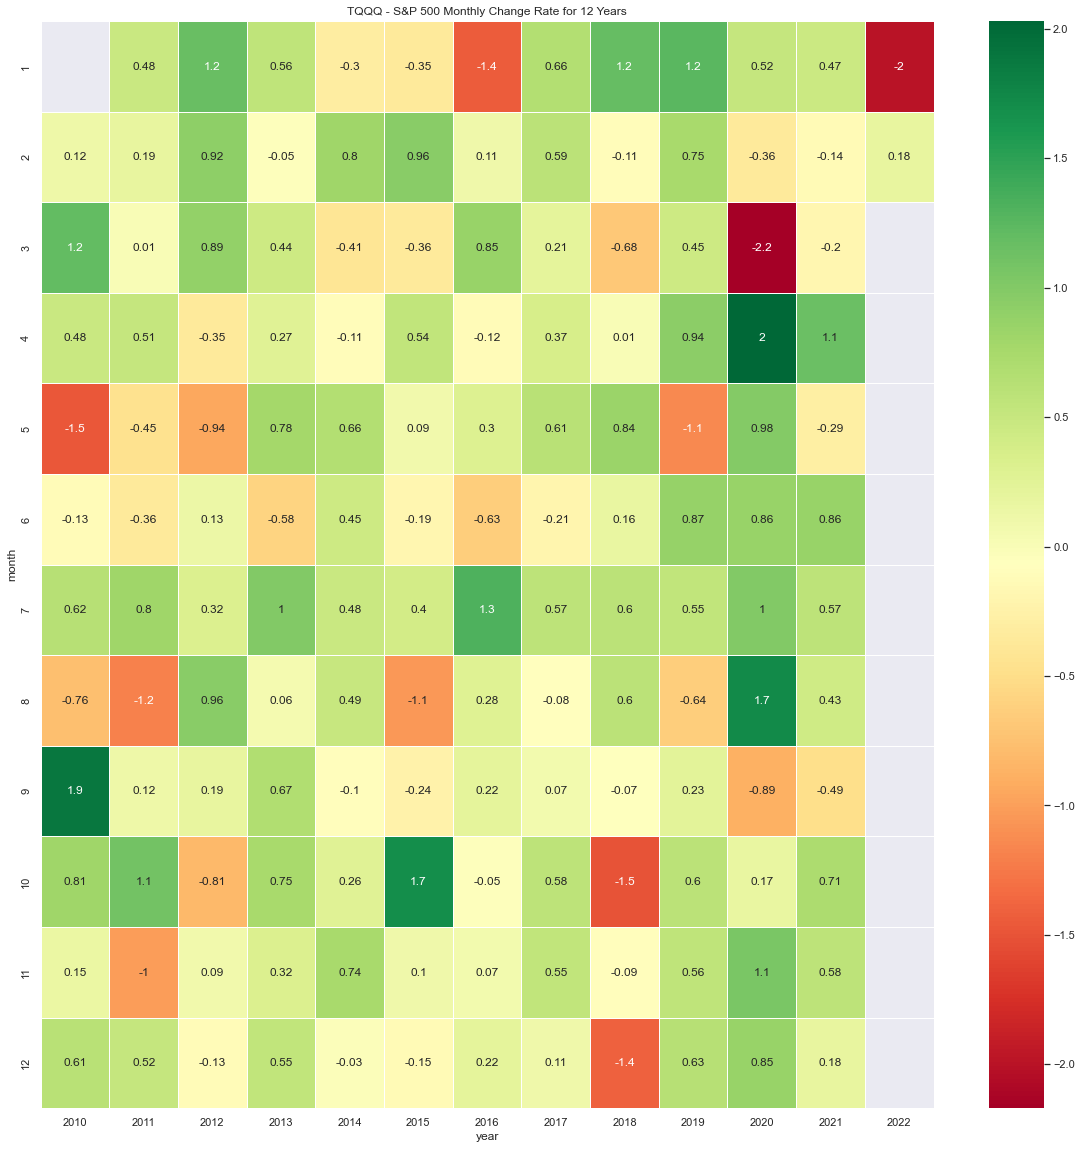

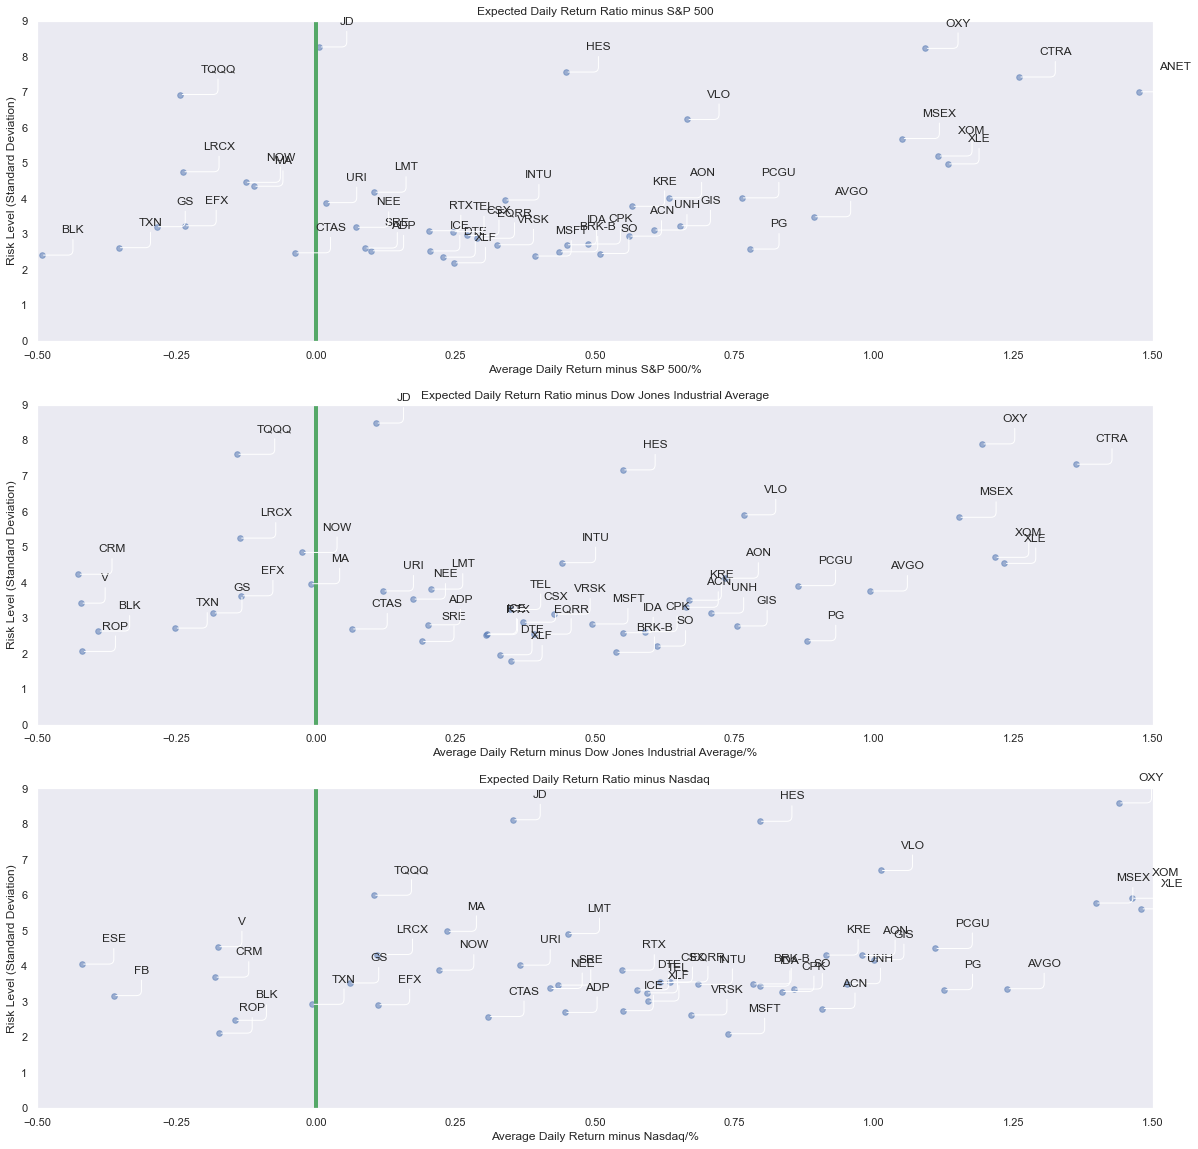

In [4]:
import sys
print(sys.executable)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import seaborn as sns
t1 = []
def stock_anaysis(tick_list, yr_len, end = datetime.now()):
    start = datetime(end.year - yr_len,end.month,end.day)
    tick_rate_df = web.DataReader(tick_list,'yahoo',start,end)['Adj Close'].pct_change(periods = 7)
    indexes = web.DataReader(['^GSPC','^DJI','^IXIC'], 'yahoo', start, end)['Adj Close'].pct_change(periods = 7)

    SNP = rate_difference_df(index = indexes['^GSPC'], tickers = tick_rate_df)*100
    SNP.name = 'S&P 500'
    DOW = rate_difference_df(index= indexes['^DJI'], tickers = tick_rate_df)*100
    DOW.name = 'Dow Jones Industrial Average'
    Nasdaq = rate_difference_df(index = indexes['^IXIC'], tickers = tick_rate_df)*100
    Nasdaq.name = 'Nasdaq'
    # global df1
    # df1 = SNP.all.corr()
    # global df2
    # df2 = DOW.all.corr()
    # global df3
    # df3 = Nasdaq.all.corr()
    f = plt.figure(figsize=(20,20))
    f.add_subplot(311)
    draw_a_plot(SNP)
    f.add_subplot(312)
    draw_a_plot(DOW)
    f.add_subplot(313)
    draw_a_plot(Nasdaq)
    plt.show()

def draw_a_plot (tick):
    area = np.pi*10
    plt.scatter(tick.mean(), tick.std(), alpha = 0.5,s =area)
    plt.ylim([0,9])
    plt.xlim([-0.5,1.5])
    plt.title(f'Expected Daily Return Ratio minus {tick.name}')
    plt.xlabel(f'Average Daily Return minus {tick.name}/%')
    plt.ylabel('Risk Level (Standard Deviation)')
    plt.axvline(x=0, linewidth=4, color='g')

    for label, x, y in zip(tick.columns, tick.mean(), tick.std()):
        plt.annotate(
            f'{label}',
            xy = (x, y), xytext = (20, 20),
            textcoords = 'offset points', ha = 'left', va = 'bottom',
            arrowprops = dict(arrowstyle = '-', connectionstyle = 'angle,angleA=-90,angleB=180,rad=5'))
    plt.grid()

def rate_difference_df (index, tickers):
    rate_diff_df = tickers.copy(deep = True)
    for j in tickers.columns:
        rate_diff_df[j] = tickers[j] - index
    rate_diff_df = rate_diff_df.dropna()
    return rate_diff_df

def annual_analysis(ticker, yearlen = 12, end = datetime.now(), with_number = False):
    sns.set_style('whitegrid')
    start = datetime(end.year - yearlen,1,1)
    tick_rate = web.DataReader(ticker,'yahoo',start,end)['Adj Close'].pct_change(periods = 5)
    snp = web.DataReader('^GSPC', 'yahoo', start, end)['Adj Close'].pct_change(periods = 5)
    tick_diff = (tick_rate-snp)*100
    tick_diff = tick_rate.dropna()
    tick_diff_df = pd.DataFrame(tick_diff)
    tick_diff_df['date'] = tick_diff_df.index
    tick_diff_df['year'] = tick_diff_df.date.dt.year
    tick_diff_df['month'] = tick_diff_df.date.dt.month

    sns.set_theme()
    piv_tick = tick_diff_df.pivot_table(index='month', columns='year', values='Adj Close',aggfunc=np.sum)
    piv_tick = piv_tick.round(decimals=2)
    f, ax = plt.subplots(figsize=(20, 20))
    global t1
    t1 = piv_tick.sum(axis=0)
    plt.title(f'{ticker} - S&P 500 Monthly Change Rate for {yearlen} Years')
    sns.heatmap(piv_tick, annot=with_number, linewidths=.5, ax=ax, cmap='RdYlGn')
    plt.show()
   
annual_analysis('TQQQ', with_number=True)
stock_anaysis(['ROP','MSA','ESE','ANET','LRCX','TPL','PXD','DTE','PCGU','CPK','SRE','IDA','CTAS','URI','ADP','VRSK','EFX','MSEX','HUYA','SO','NEE','GIS','RTX','LMT','CSX','JD','DIDI','EQRR','XLE','XLF','VLO','GS','KRE','HES','APA','CTRA','MRO','OXY','EOG','COP','DVN','TQQQ','COIN','MSFT','V','CRM','UNH','MA','FB','TSLA','XOM','NEE','PG','TXN','ACN','NOW','BRK-B','BLK','ICE','AON','FIS','TEL','INTU','AVGO'], yr_len = 1)


